In [ ]:
import pandas as pd
import numpy as np
import string
import re

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Membaca file Excel yang berisi data ulasan Spotify
data_spotify= pd.read_excel('Ulasan-Spotify-2500-Data.xlsx')
print(data_spotify)

                    username  rating            date  \
0               risnanda ari       5  9/8/2023 19:14   
1     Desta Rahayu Supriatna       4  9/6/2023 21:50   
2           m.zainal ilmi456       2  9/6/2023 18:49   
3                   AsYFanno       4  9/5/2023 19:33   
4          Elnovani Carolina       1  9/4/2023 13:22   
...                      ...     ...             ...   
2495      The Instrumen Life       1   1/1/2024 1:58   
2496       Ricky Hillmansyah       2   1/1/2024 1:21   
2497         Isqha Alyadilla       1   1/1/2024 0:46   
2498           Surya Sitorus       5   1/1/2024 0:39   
2499            MHD Syahrial       1   1/1/2024 0:37   

                                                 review  
0     Spotify, dengan aplikasi ini kalian bisa denge...  
1     Kenapa setiap mau melakukan pembayaran premium...  
2     Apk nya bagus.tapi jujur ya saya kurang suka s...  
3     Sekarang apa-apa premium, apa-apa premium. Uan...  
4     Ini gimana ya ko mau bayar berl

In [ ]:
data_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  2500 non-null   object
 1   rating    2500 non-null   int64 
 2   date      2500 non-null   object
 3   review    2500 non-null   object
dtypes: int64(1), object(3)
memory usage: 78.2+ KB


In [ ]:
# Cek missing values
data_spotify.isnull().sum()


username    0
rating      0
date        0
review      0
dtype: int64

In [ ]:
# Cek duplicate values
data_spotify.duplicated().value_counts()

False    2500
Name: count, dtype: int64

In [ ]:
# Dataframe spotify
data_spotify.shape

(2500, 4)

In [ ]:
spotify = data_spotify['review']

### **Case Folding & Clean Data**

In [ ]:
def preprocessing(text):
    text = text.lower() # mengubah menjadi huruf kecil
    text = re.sub(r',','', text) # Menghapus koma
    text = text.translate(str.maketrans(' ',' ',string.punctuation)) # menghilangkan tanda baca
    text = re.sub('[^a-zA-Z]',' ', text) # Menghapus karakter selain huruf
    text = re.sub(r"\b[a-zA-Z]\b"," ",text) # Menghapus karakter tunggal (single character)
    return text


In [ ]:
data_spotify['clean'] = [preprocessing(i) for i in spotify]
spotify = data_spotify['clean']

In [ ]:
data_spotify.head(10)

,username,rating,date,review,clean
0,risnanda ari,5,9/8/2023 19:14,"Spotify, dengan aplikasi ini kalian bisa denge...",spotify dengan aplikasi ini kalian bisa denger...
1,Desta Rahayu Supriatna,4,9/6/2023 21:50,Kenapa setiap mau melakukan pembayaran premium...,kenapa setiap mau melakukan pembayaran premium...
2,m.zainal ilmi456,2,9/6/2023 18:49,Apk nya bagus.tapi jujur ya saya kurang suka s...,apk nya bagustapi jujur ya saya kurang suka sa...
3,AsYFanno,4,9/5/2023 19:33,"Sekarang apa-apa premium, apa-apa premium. Uan...",sekarang apaapa premium apaapa premium uang gw...
4,Elnovani Carolina,1,9/4/2023 13:22,Ini gimana ya ko mau bayar berlangganan premiu...,ini gimana ya ko mau bayar berlangganan premiu...
5,daisy pierta,2,9/30/2023 21:31,"""tidak dapat memuat lirik untuk lagu ini"" Buka...",tidak dapat memuat lirik untuk lagu ini bukan ...
6,Nicholas gabriel,4,9/30/2023 12:14,"Spotify bagus banget buat denger lagu, lengkap...",spotify bagus banget buat denger lagu lengkap ...
7,Indri Atua,1,9/30/2023 10:52,"Kenapa pas saya mau langganan malah muncul ""ti...",kenapa pas saya mau langganan malah muncul tid...
8,Haura Nazifa,5,9/3/2023 22:10,"Speaker nya baguss,kalo pake headphone nya ber...",speaker nya bagusskalo pake headphone nya bera...
9,War Exe,1,9/3/2023 19:24,Fitur untuk mengulang lagu otomatis kek dulu m...,fitur untuk mengulang lagu otomatis kek dulu m...


In [ ]:
print(data_spotify)

                    username  rating            date  \
0               risnanda ari       5  9/8/2023 19:14   
1     Desta Rahayu Supriatna       4  9/6/2023 21:50   
2           m.zainal ilmi456       2  9/6/2023 18:49   
3                   AsYFanno       4  9/5/2023 19:33   
4          Elnovani Carolina       1  9/4/2023 13:22   
...                      ...     ...             ...   
2495      The Instrumen Life       1   1/1/2024 1:58   
2496       Ricky Hillmansyah       2   1/1/2024 1:21   
2497         Isqha Alyadilla       1   1/1/2024 0:46   
2498           Surya Sitorus       5   1/1/2024 0:39   
2499            MHD Syahrial       1   1/1/2024 0:37   

                                                 review  \
0     Spotify, dengan aplikasi ini kalian bisa denge...   
1     Kenapa setiap mau melakukan pembayaran premium...   
2     Apk nya bagus.tapi jujur ya saya kurang suka s...   
3     Sekarang apa-apa premium, apa-apa premium. Uan...   
4     Ini gimana ya ko mau bayar

### **Tokenizing**

In [ ]:
from nltk.tokenize import RegexpTokenizer
# Membuat tokenizer untuk kata dan karakter non-spasi
regexp = RegexpTokenizer(r'\w+[$[0-9]+|\S+')
# Melakukan tokenisasi pada kolom 'clean' dari data_spotify
data_spotify['Token'] = data_spotify['clean'].apply(regexp.tokenize)

In [ ]:
data_spotify.head(10)

,username,rating,date,review,clean,Token
0,risnanda ari,5,9/8/2023 19:14,"Spotify, dengan aplikasi ini kalian bisa denge...",spotify dengan aplikasi ini kalian bisa denger...,"[spotify, dengan, aplikasi, ini, kalian, bisa,..."
1,Desta Rahayu Supriatna,4,9/6/2023 21:50,Kenapa setiap mau melakukan pembayaran premium...,kenapa setiap mau melakukan pembayaran premium...,"[kenapa, setiap, mau, melakukan, pembayaran, p..."
2,m.zainal ilmi456,2,9/6/2023 18:49,Apk nya bagus.tapi jujur ya saya kurang suka s...,apk nya bagustapi jujur ya saya kurang suka sa...,"[apk, nya, bagustapi, jujur, ya, saya, kurang,..."
3,AsYFanno,4,9/5/2023 19:33,"Sekarang apa-apa premium, apa-apa premium. Uan...",sekarang apaapa premium apaapa premium uang gw...,"[sekarang, apaapa, premium, apaapa, premium, u..."
4,Elnovani Carolina,1,9/4/2023 13:22,Ini gimana ya ko mau bayar berlangganan premiu...,ini gimana ya ko mau bayar berlangganan premiu...,"[ini, gimana, ya, ko, mau, bayar, berlangganan..."
5,daisy pierta,2,9/30/2023 21:31,"""tidak dapat memuat lirik untuk lagu ini"" Buka...",tidak dapat memuat lirik untuk lagu ini bukan ...,"[tidak, dapat, memuat, lirik, untuk, lagu, ini..."
6,Nicholas gabriel,4,9/30/2023 12:14,"Spotify bagus banget buat denger lagu, lengkap...",spotify bagus banget buat denger lagu lengkap ...,"[spotify, bagus, banget, buat, denger, lagu, l..."
7,Indri Atua,1,9/30/2023 10:52,"Kenapa pas saya mau langganan malah muncul ""ti...",kenapa pas saya mau langganan malah muncul tid...,"[kenapa, pas, saya, mau, langganan, malah, mun..."
8,Haura Nazifa,5,9/3/2023 22:10,"Speaker nya baguss,kalo pake headphone nya ber...",speaker nya bagusskalo pake headphone nya bera...,"[speaker, nya, bagusskalo, pake, headphone, ny..."
9,War Exe,1,9/3/2023 19:24,Fitur untuk mengulang lagu otomatis kek dulu m...,fitur untuk mengulang lagu otomatis kek dulu m...,"[fitur, untuk, mengulang, lagu, otomatis, kek,..."


### **Stopwords Removal**

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('indonesian'))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Mengambil daftar stopwords Bahasa Indonesia dari NLTK
list_stopwords = stopwords.words('indonesian')
# Menambahkan beberapa kata umum yang tidak digunakan
list_stopwords.extend(['yg','sih','ud','ya','berasa','lah','jg','udh','gt','ku','lo','bs','dong','tp','knp','jgn','g','lg','ko','gw','btw','nya','di','yah','ini','malah','aja','gak','gk','yaa','dlu','biar','si','gue','bgt','ny','ga','kalo','klo','dgn','dll','gini','trs','gpp','gua','tpi','dah','nih','eh','tuh'])
# Konversi daftar stopwords ke set untuk pencarian lebih cepat
list_stopwords = set(list_stopwords)

def stopword_removal(text):
    # Pisahkan teks menjadi kata-kata
    tokens = word_tokenize(text)
    # Hapus kata-kata yang termasuk dalam stopwords
    tokens = [word for word in tokens if word not in list_stopwords]
    return tokens

# Kolom 'clean' berisi teks yang ingin dihapus stopwords-nya
data_spotify['Stopwords'] = data_spotify['clean'].apply(stopword_removal)
data_spotify


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,username,rating,date,review,clean,Token,Stopwords
0,risnanda ari,5,9/8/2023 19:14,"Spotify, dengan aplikasi ini kalian bisa denge...",spotify dengan aplikasi ini kalian bisa denger...,"[spotify, dengan, aplikasi, ini, kalian, bisa,...","[spotify, aplikasi, dengerin, lagu, suka, negr..."
1,Desta Rahayu Supriatna,4,9/6/2023 21:50,Kenapa setiap mau melakukan pembayaran premium...,kenapa setiap mau melakukan pembayaran premium...,"[kenapa, setiap, mau, melakukan, pembayaran, p...","[pembayaran, premium, dsetiap, paket, apapun, ..."
2,m.zainal ilmi456,2,9/6/2023 18:49,Apk nya bagus.tapi jujur ya saya kurang suka s...,apk nya bagustapi jujur ya saya kurang suka sa...,"[apk, nya, bagustapi, jujur, ya, saya, kurang,...","[apk, bagustapi, jujur, suka, fitur, premium, ..."
3,AsYFanno,4,9/5/2023 19:33,"Sekarang apa-apa premium, apa-apa premium. Uan...",sekarang apaapa premium apaapa premium uang gw...,"[sekarang, apaapa, premium, apaapa, premium, u...","[apaapa, premium, apaapa, premium, uang, nabun..."
4,Elnovani Carolina,1,9/4/2023 13:22,Ini gimana ya ko mau bayar berlangganan premiu...,ini gimana ya ko mau bayar berlangganan premiu...,"[ini, gimana, ya, ko, mau, bayar, berlangganan...","[gimana, bayar, berlangganan, premium, susah, ..."
...,...,...,...,...,...,...,...
2495,The Instrumen Life,1,1/1/2024 1:58,"tolong lah, boleh iklan tapi jangan iklan horo...",tolong lah boleh iklan tapi jangan iklan hororr,"[tolong, lah, boleh, iklan, tapi, jangan, ikla...","[tolong, iklan, iklan, hororr]"
2496,Ricky Hillmansyah,2,1/1/2024 1:21,kenapa ya Spotify saya gabisa kebuka kalo pake...,kenapa ya spotify saya gabisa kebuka kalo pake...,"[kenapa, ya, spotify, saya, gabisa, kebuka, ka...","[spotify, gabisa, kebuka, pake, paket, interne..."
2497,Isqha Alyadilla,1,1/1/2024 0:46,Sengaja ya pasang iklan-iklan horror agar oran...,sengaja ya pasang iklaniklan horror agar orang...,"[sengaja, ya, pasang, iklaniklan, horror, agar...","[sengaja, pasang, iklaniklan, horror, orang, b..."
2498,Surya Sitorus,5,1/1/2024 0:39,bagus saya berterimakasih karena Spotify membu...,bagus saya berterimakasih karena spotify membu...,"[bagus, saya, berterimakasih, karena, spotify,...","[bagus, berterimakasih, spotify, sedih, temani..."


### **Stemming**

In [ ]:
pip install Sastrawi

In [ ]:
pip install swifter

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# Membuat instance dari StemmerFactory
factory = StemmerFactory()

# Membuat stemmer menggunakan factory
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada suatu term
def stemmed_wrapper(term):
    return stemmer.stem(term)

# Dictionary untuk menyimpan term yang sudah di-stemming
term_dict = {}

# Mengambil setiap tokens dari data_spotify['Stopwords']
for tokens in data_spotify['Stopwords']:
    for term in tokens:
        # Jika term belum ada di dictionary, tambahkan
        if term not in term_dict:
            term_dict[term] = ''

# Menghitung jumlah term dalam dictionary
print(len(term_dict))
print("------------------------")

# Melakukan stemming pada setiap term dalam dictionary
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term, ":", term_dict[term])

# Menampilkan dictionary yang berisi term yang sudah di-stemming
print(term_dict)
print("------------------------")


Streaming output truncated to the last 5000 lines.
lgi : lgi
uninstal : uninstal
instal : instal
bbrp : bbrp
tetep : tetep
gamau : gamau
bertahuntahun : bertahuntahun
semenjak : semenjak
bermasalah : masalah
internet : internet
hapus : hapus
cache : cache
sampe : sampe
pasang : pasang
ulang : ulang
dibantu : bantu
segitu : segitu
kah : kah
bebas : bebas
ni : ni
apkmasa : apkmasa
dasar : dasar
dev : dev
tlol : tlol
ngelag : ngelag
memutar : putar
memperpanjang : panjang
memperbolehkan : boleh
memakai : pakai
premiun : premiun
jangka : jangka
em : em
keluhan : keluh
wktu : wktu
oke : oke
gatau : gatau
tdk : tdk
psti : psti
sndri : sndri
pikir : pikir
krna : krna
mslh : mslh
kuota : kuota
trnyta : trnyta
sudh : sudh
hasilnya : hasil
msih : msih
cm : cm
keluhannya : keluh
selebihnya : lebih
kesimpulannya : simpul
penggunanya : guna
menunggu : tunggu
melompati : lompat
sesuakin : sesuakin
kuharap : harap
mengerti : erti
sihsetiap : sihsetiap
gituterus : gituterus
ngeliat : ngeliat
bisapadah

In [ ]:
# Fungsi untuk mengaplikasikan term yang sudah di-stemming ke dalam dokumen
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

# Menggunakan swifter untuk meningkatkan kinerja penggunaan fungsi apply
data_spotify['Stemming'] = data_spotify['Stopwords'].swifter.apply(get_stemmed_term)

# Mencetak DataFrame yang sudah diperbarui
print(data_spotify)


Pandas Apply:   0%|          | 0/2500 [00:00<?, ?it/s]

                    username  rating            date  \
0               risnanda ari       5  9/8/2023 19:14   
1     Desta Rahayu Supriatna       4  9/6/2023 21:50   
2           m.zainal ilmi456       2  9/6/2023 18:49   
3                   AsYFanno       4  9/5/2023 19:33   
4          Elnovani Carolina       1  9/4/2023 13:22   
...                      ...     ...             ...   
2495      The Instrumen Life       1   1/1/2024 1:58   
2496       Ricky Hillmansyah       2   1/1/2024 1:21   
2497         Isqha Alyadilla       1   1/1/2024 0:46   
2498           Surya Sitorus       5   1/1/2024 0:39   
2499            MHD Syahrial       1   1/1/2024 0:37   

                                                 review  \
0     Spotify, dengan aplikasi ini kalian bisa denge...   
1     Kenapa setiap mau melakukan pembayaran premium...   
2     Apk nya bagus.tapi jujur ya saya kurang suka s...   
3     Sekarang apa-apa premium, apa-apa premium. Uan...   
4     Ini gimana ya ko mau bayar

In [ ]:
spotify = pd.DataFrame(data_spotify)
spotify.to_excel ('data_preprocessing.xlsx', index = False, header=True)

### **Labeling**

In [ ]:
!pip install transformers

In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=86dfe19c161b2d3b17360b3d29dee5f98fc1824967a6c93d35b2ec2f22967a6a
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
data_spotify= pd.read_excel('data_preprocessing.xlsx')

In [ ]:
data_spotify.head()

,username,rating,date,review,clean,Token,Stopwords,Stemming
0,risnanda ari,5,9/8/2023 19:14,"Spotify, dengan aplikasi ini kalian bisa denge...",spotify dengan aplikasi ini kalian bisa denger...,"['spotify', 'dengan', 'aplikasi', 'ini', 'kali...","['spotify', 'aplikasi', 'dengerin', 'lagu', 's...","['spotify', 'aplikasi', 'dengerin', 'lagu', 's..."
1,Desta Rahayu Supriatna,4,9/6/2023 21:50,Kenapa setiap mau melakukan pembayaran premium...,kenapa setiap mau melakukan pembayaran premium...,"['kenapa', 'setiap', 'mau', 'melakukan', 'pemb...","['pembayaran', 'premium', 'dsetiap', 'paket', ...","['bayar', 'premium', 'dsetiap', 'paket', 'apa'..."
2,m.zainal ilmi456,2,9/6/2023 18:49,Apk nya bagus.tapi jujur ya saya kurang suka s...,apk nya bagustapi jujur ya saya kurang suka sa...,"['apk', 'nya', 'bagustapi', 'jujur', 'ya', 'sa...","['apk', 'bagustapi', 'jujur', 'suka', 'fitur',...","['apk', 'bagustapi', 'jujur', 'suka', 'fitur',..."
3,AsYFanno,4,9/5/2023 19:33,"Sekarang apa-apa premium, apa-apa premium. Uan...",sekarang apaapa premium apaapa premium uang gw...,"['sekarang', 'apaapa', 'premium', 'apaapa', 'p...","['apaapa', 'premium', 'apaapa', 'premium', 'ua...","['apaapa', 'premium', 'apaapa', 'premium', 'ua..."
4,Elnovani Carolina,1,9/4/2023 13:22,Ini gimana ya ko mau bayar berlangganan premiu...,ini gimana ya ko mau bayar berlangganan premiu...,"['ini', 'gimana', 'ya', 'ko', 'mau', 'bayar', ...","['gimana', 'bayar', 'berlangganan', 'premium',...","['gimana', 'bayar', 'langgan', 'premium', 'sus..."


In [ ]:
from googletrans.client import Translator
translator = Translator()

from transformers import pipeline
sentiment_classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
def clean_spotify(spotify):
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])](\w+:\/\/\S+)"," ", spotify).split()) ## Mengganti karakter non-alfanumerik dan tag

In [ ]:
# Fungsi translate dari translator dengan destinasi bahasa Inggris
data_spotify['label'] = data_spotify['clean'].str.encode('ascii', 'ignore').apply(translator.translate, dest='en')

# Menggunakan getattr() untuk mendapatkan atribut 'text' dari hasil terjemahan
data_spotify['label'] = data_spotify['label'].apply(getattr, args=('text',))

# Membersihkan teks di setiap baris DataFrame menggunakan fungsi clean_spotify melalui lambda function
data_spotify['label'] = data_spotify.apply(lambda x: clean_spotify(x['label']), axis=1)


In [ ]:
df = (
    data_spotify
    .assign(sentiment=lambda x: x['label'].apply(lambda s: sentiment_classifier(s)))
    .assign(
        label=lambda x: x['sentiment'].apply(lambda s: s[0]['label']),
        score=lambda x: x['sentiment'].apply(lambda s: s[0]['score'])
    )
)

In [ ]:
df.sample(10)

,username,rating,date,review,clean,Token,Stopwords,Stemming,label,sentiment,score
895,Emilia Rosa,1,12/12/2023 14:59,"Banyak bug,tidak bisa memakai WiFi,kalau bisa ...",banyak bugtidak bisa memakai wifikalau bisa bu...,"['banyak', 'bugtidak', 'bisa', 'memakai', 'wif...","['bugtidak', 'memakai', 'wifikalau', 'bug', 'p...","['bugtidak', 'pakai', 'wifikalau', 'bug', 'per...",NEGATIVE,"[{'label': 'NEGATIVE', 'score': 0.999497652053...",0.999498
393,Rizki Reni,1,12/28/2023 10:38,Ka ko ga bisa muter lagu harus ke premium teru...,ka ko ga bisa muter lagu harus ke premium teru...,"['ka', 'ko', 'ga', 'bisa', 'muter', 'lagu', 'h...","['ka', 'muter', 'lagu', 'premium', 'susah', 'n...","['ka', 'muter', 'lagu', 'premium', 'susah', 'n...",NEGATIVE,"[{'label': 'NEGATIVE', 'score': 0.999241113662...",0.999241
683,Alanis,1,12/19/2023 21:59,sekarang spotify kalau mau skip lagu tuh ada b...,sekarang spotify kalau mau skip lagu tuh ada b...,"['sekarang', 'spotify', 'kalau', 'mau', 'skip'...","['spotify', 'skip', 'lagu', 'batasannyadan', '...","['spotify', 'skip', 'lagu', 'batasannyadan', '...",NEGATIVE,"[{'label': 'NEGATIVE', 'score': 0.989160239696...",0.989160
1170,Daviano R,1,11/26/2023 2:36,"ngtd mentang' ga premium,stiap putar satu lagu...",ngtd mentang ga premiumstiap putar satu lagu l...,"['ngtd', 'mentang', 'ga', 'premiumstiap', 'put...","['ngtd', 'mentang', 'premiumstiap', 'putar', '...","['ngtd', 'mentang', 'premiumstiap', 'putar', '...",NEGATIVE,"[{'label': 'NEGATIVE', 'score': 0.995355367660...",0.995355
322,MARIO Situmorang,5,12/3/2023 15:57,Makasih Spotify Aplikasi yang sangat bagus Aku...,makasih spotify aplikasi yang sangat bagus aku...,"['makasih', 'spotify', 'aplikasi', 'yang', 'sa...","['makasih', 'spotify', 'aplikasi', 'bagus', 's...","['makasih', 'spotify', 'aplikasi', 'bagus', 's...",POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999874353408...",0.999874
1617,Fahri Priyanto,5,1/7/2024 16:36,"kalo pas malam iklan horrornya dihapus dah,kal...",kalo pas malam iklan horrornya dihapus dahkalo...,"['kalo', 'pas', 'malam', 'iklan', 'horrornya',...","['pas', 'malam', 'iklan', 'horrornya', 'dihapu...","['pas', 'malam', 'iklan', 'horrornya', 'hapus'...",POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999027013778...",0.999027
1826,prissila kanayaputri,3,1/28/2024 21:20,Sekarang Spotify kenapa banyak iklannya sihhh ...,sekarang spotify kenapa banyak iklannya sihhh ...,"['sekarang', 'spotify', 'kenapa', 'banyak', 'i...","['spotify', 'iklannya', 'sihhh', 'denerin', 'i...","['spotify', 'iklan', 'sihhh', 'denerin', 'ikla...",NEGATIVE,"[{'label': 'NEGATIVE', 'score': 0.994158029556...",0.994158
1654,Wawan Wijaya,2,1/6/2024 18:26,makin gila iklan nya tolong jangan ada iklan y...,makin gila iklan nya tolong jangan ada iklan y...,"['makin', 'gila', 'iklan', 'nya', 'tolong', 'j...","['gila', 'iklan', 'tolong', 'iklan', 'horor', ...","['gila', 'iklan', 'tolong', 'iklan', 'horor', ...",NEGATIVE,"[{'label': 'NEGATIVE', 'score': 0.996239542961...",0.996240
176,Defry Octav,1,12/5/2023 8:44,"Aplikasi sering error tidak mau putar lagu, pa...",aplikasi sering error tidak mau putar lagu pad...,"['aplikasi', 'sering', 'error', 'tidak', 'mau'...","['aplikasi', 'error', 'putar', 'lagu', 'udah',...","['aplikasi', 'error', 'putar', 'lagu', 'udah',...",NEGATIVE,"[{'label': 'NEGATIVE', 'score': 0.996154010295...",0.996154
2466,Yogi Prawira,3,1/1/2024 23:59,"akhir akhir ini banyak sekali bug, entah ketik...",akhir akhir ini banyak sekali bug entah ketika...,"['akhir', 'akhir', 'ini', 'banyak', 'sekali', ...","['bug', 'menjeda', 'lagu', 'putar', 'lag', 'me...","['bug', 'jeda', 'lagu', 'putar', 'lag', 'denga...",NEGATIVE,"[{'label': 'NEGATIVE', 'score': 0.994887411594...",0.994887


In [ ]:
import pandas as pd

# Memisahkan data berdasarkan sentimen
label_POSITIVE = df[df['label'] == 'POSITIVE']
label_NEGATIVE = df[df['label'] == 'NEGATIVE']

# Menghitung jumlah masing-masing sentimen
jumlah_POSITIVE = len(label_POSITIVE)
jumlah_NEGATIVE = len(label_NEGATIVE)

# Mencetak hasil
print("Jumlah Sentimen Positif:", jumlah_POSITIVE)
print("Jumlah Sentimen Negatif:", jumlah_NEGATIVE)


Jumlah Sentimen Positif: 766
Jumlah Sentimen Negatif: 1734


### Data Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
x = df['clean']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [ ]:
print('Banyak data x_train :', len(x_train))
print('Banyak data x_test :', len(x_test))
print('Banyak data y_train :', len(y_train))
print('Banyak data y_test :', len(y_test))

Banyak data x_train : 1750
Banyak data x_test : 750
Banyak data y_train : 1750
Banyak data y_test : 750


In [ ]:
vectorizer = CountVectorizer()

In [ ]:
vectorizer.fit(x_train)

CountVectorizer()

In [ ]:
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [ ]:
vectorizer.vocabulary_

{'cukup': 803,
 'bagus': 262,
 'tapi': 4136,
 'sayang': 3658,
 'nya': 3034,
 'sering': 3842,
 'nge': 2902,
 'lag': 2144,
 'walaupun': 4537,
 'jaringan': 1698,
 'lancar': 2219,
 'mohon': 2773,
 'tingkat': 4333,
 'kan': 1810,
 'lagi': 2146,
 'ya': 4594,
 'suka': 4071,
 'banget': 321,
 'sama': 3618,
 'spotify': 4010,
 'banyak': 350,
 'lagu': 2160,
 'yang': 4612,
 'bisa': 605,
 'di': 899,
 'putar': 3491,
 'dll': 1120,
 'masalahnyagak': 2439,
 'tau': 4153,
 'yah': 4603,
 'cuman': 806,
 'saya': 3655,
 'ngerasa': 2933,
 'atau': 225,
 'ada': 15,
 'juga': 1763,
 'samasaya': 3620,
 'sedikit': 3714,
 'kesal': 1957,
 'kalau': 1795,
 'enak': 1217,
 'enaknya': 1223,
 'denger': 870,
 'tiba': 4310,
 'lagunya': 2173,
 'mati': 2461,
 'dengan': 862,
 'sendirinya': 3807,
 'terus': 4274,
 'mau': 2467,
 'harus': 1473,
 'masuk': 2451,
 'ke': 1848,
 'apk': 169,
 'spotifynya': 4022,
 'pas': 3176,
 'udah': 4436,
 'terputar': 4256,
 'beberapa': 410,
 'detik': 886,
 'baru': 368,
 'didengar': 944,
 'jadi': 1677,
 

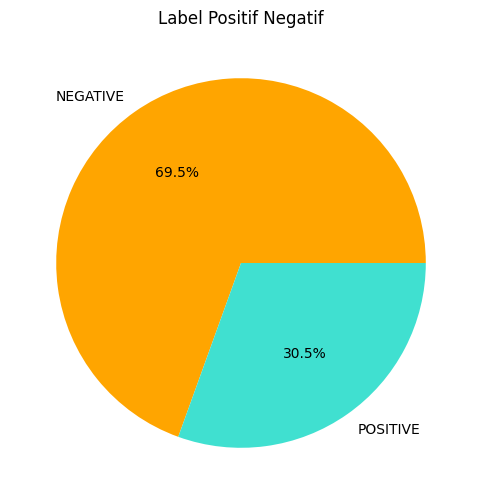

In [ ]:
import matplotlib.pyplot as plt

label_counts = y_train.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(label_counts.values, labels=['NEGATIVE', 'POSITIVE'], colors=['Orange', 'Turquoise'], autopct='%1.1f%%')
plt.title('Label Positif Negatif')
plt.show()


### **Evaluasi Model SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='linear')

In [ ]:
svm_model.fit(x_train_vec, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_svm = svm_model.predict(x_test_vec)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test,  y_pred_svm)
class_report = classification_report(y_test,  y_pred_svm)


In [ ]:
print("Accuracy:", accuracy_svm)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.772

Confusion Matrix:
 [[421  97]
 [ 74 158]]

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.85      0.81      0.83       518
    POSITIVE       0.62      0.68      0.65       232

    accuracy                           0.77       750
   macro avg       0.74      0.75      0.74       750
weighted avg       0.78      0.77      0.77       750



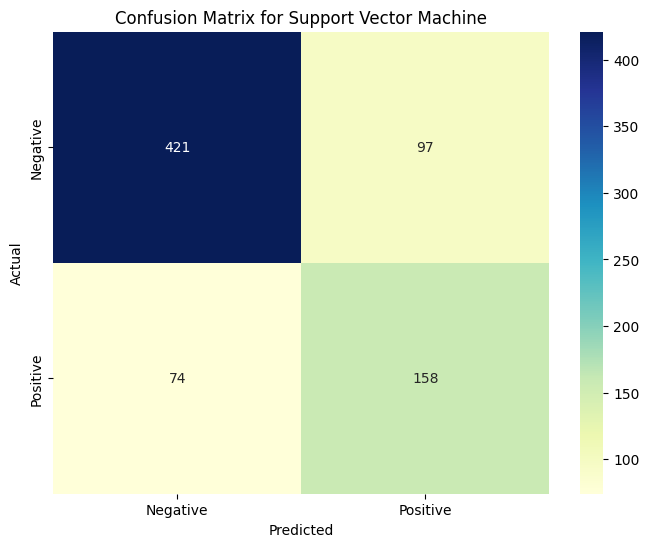

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Mengambil nilai TP, TN, FP, FN dari confusion matrix
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Membuat confusion matrix baru dengan nilai TP, TN, FP, FN
new_conf_matrix = [[TN, FP], [FN, TP]]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()


### **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_vec, y_train)

MultinomialNB()

In [ ]:
y_pred_nb = naive_bayes.predict(x_test_vec)

In [ ]:
accuracy_nb = accuracy_score(y_test,y_pred_nb)
print("Accuracy:", accuracy_nb)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Accuracy: 0.8426666666666667

Confusion Matrix:
[[497  21]
 [ 97 135]]

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.84      0.96      0.89       518
    POSITIVE       0.87      0.58      0.70       232

    accuracy                           0.84       750
   macro avg       0.85      0.77      0.79       750
weighted avg       0.85      0.84      0.83       750



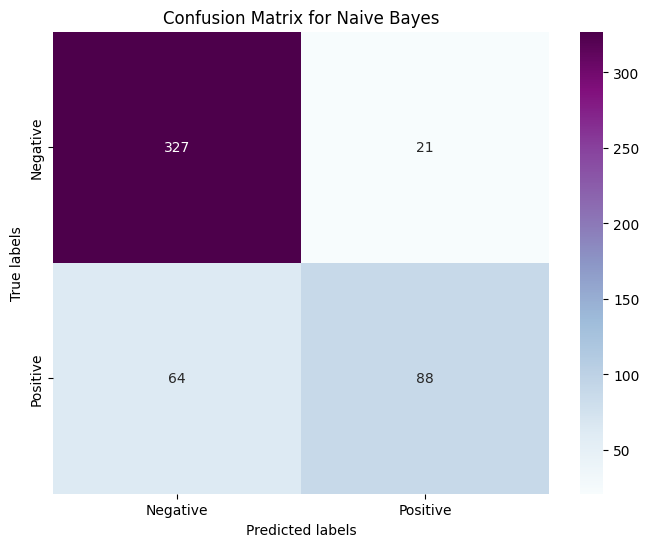

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Menghitung True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Menampilkan confusion matrix dengan label TP, TN, FP, FN dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap([[TN, FP], [FN, TP]], annot=True, fmt='d', cmap='BuPu', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


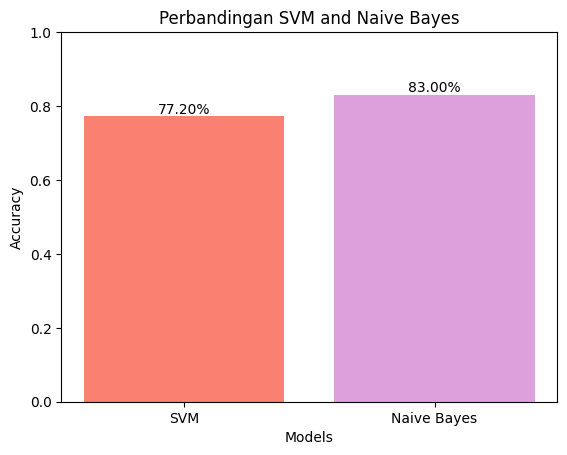

In [ ]:
# Visualisasi
labels = ['SVM', 'Naive Bayes']
accuracies = [accuracy_svm, accuracy_nb]

plt.bar(labels, accuracies, color=['Salmon', 'Plum'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Perbandingan SVM and Naive Bayes')
plt.ylim(0.0, 1.0)

# Menambahkan label persentase
for i in range(len(labels)):
    plt.text(x = i, y = accuracies[i], s = "{:.2f}%".format(accuracies[i] * 100), ha = 'center', va = 'bottom')

plt.show()

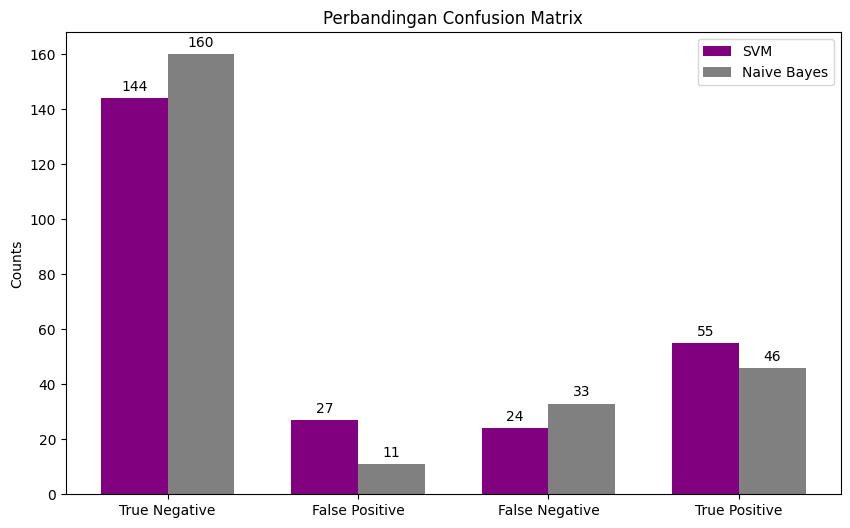

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Confusion matrices
svm_cm = confusion_matrix(y_test, y_pred_svm)
nb_cm = confusion_matrix(y_test, y_pred_nb)

# Labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Calculate values for each label
svm_values = svm_cm.ravel()
nb_values = nb_cm.ravel()

# Plotting
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, svm_values, width, label='SVM', color='purple')
rects2 = ax.bar(x + width/2, nb_values, width, label='Naive Bayes', color='gray')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Perbandingan Confusion Matrix')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Attach labels to bars
autolabel(rects1)
autolabel(rects2)

plt.show()


### **WordCloud**

In [ ]:
pip install wordcloud

In [ ]:
# Tentukan nilai untuk komentar positif dan negatif
positive_comments = 'POSITIVE'
negative_comments = 'NEGATIVE'

# Filter DataFrame berdasarkan 'label'
df_negative = df[df['label'] == negative_comments]
df_positive = df[df['label'] == positive_comments]

# Konversi kolom 'Stopwords' dari DataFrame menjadi daftar
negative_list = df_negative['Stemming'].tolist()
positive_list = df_positive['Stemming'].tolist()

# Konversi daftar kata-kata negatif dan positif menjadi dua string
filtered_negative = " ".join(map(str, negative_list))
filtered_negative = filtered_negative.lower()

filtered_positive = " ".join(map(str, positive_list))
filtered_positive = filtered_positive.lower()


### **WordCloud Positive**

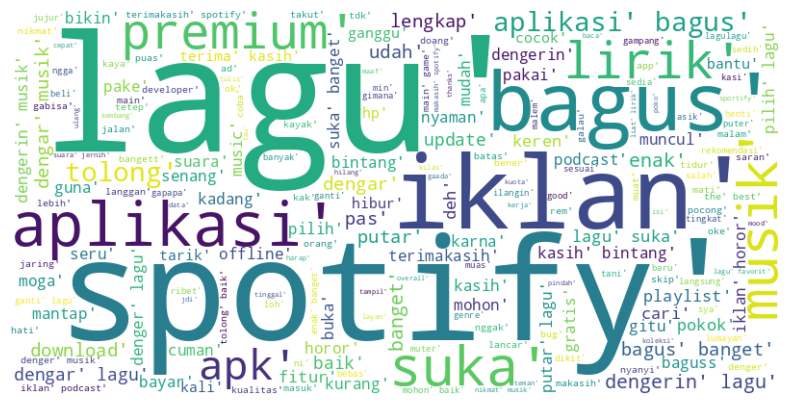

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membuat WordCloud Positif
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_positive)

# Menampilkan WordCloud Positif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### **Visualisasi Positive**

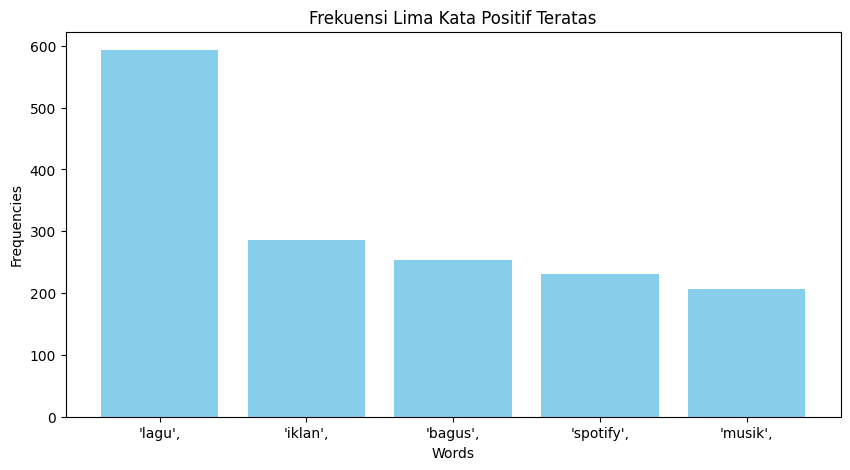

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Menghitung frekuensi kemunculan setiap kata dalam teks
word_freq = Counter(filtered_positive.split())

# Mengambil lima kata dengan frekuensi tertinggi
top_words = word_freq.most_common(5)

# Memisahkan kata-kata dan frekuensinya
words = [pair[0] for pair in top_words]
freqs = [pair[1] for pair in top_words]

# Membuat chart
plt.figure(figsize=(10, 5))
plt.bar(words, freqs, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Frekuensi Lima Kata Positif Teratas')
plt.show()


### **WordCloud Negative**

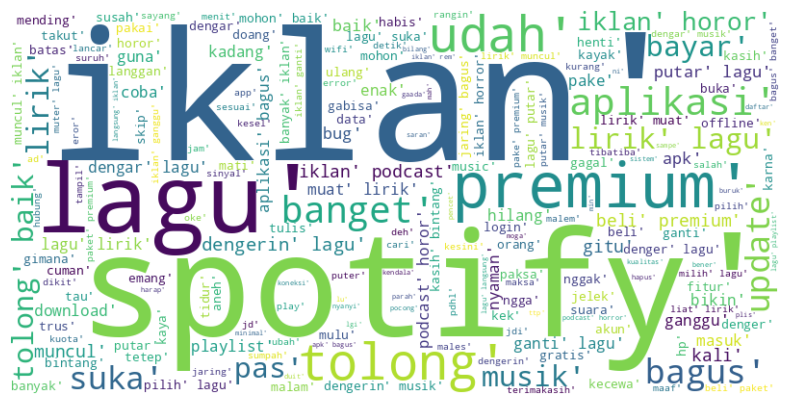

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membuat WordCloud Negatif
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_negative)

# Menampilkan WordCloud Negatif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### **Visualisasi Negatif**

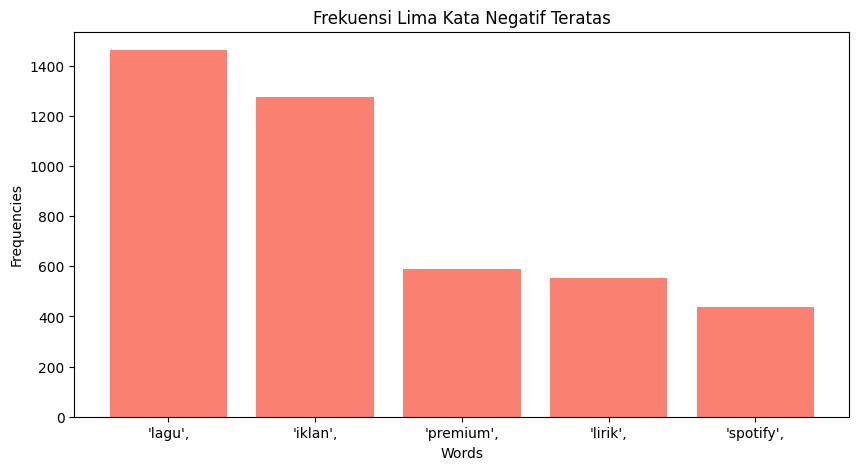

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Menghitung frekuensi kemunculan setiap kata dalam teks
word_freq = Counter(filtered_negative.split())

# Mengambil lima kata dengan frekuensi tertinggi
top_words = word_freq.most_common(5)

# Memisahkan kata-kata dan frekuensinya
words = [pair[0] for pair in top_words]
freqs = [pair[1] for pair in top_words]

# Membuat chart
plt.figure(figsize=(10, 5))
plt.bar(words, freqs, color='salmon')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Frekuensi Lima Kata Negatif Teratas')
plt.show()


In [ ]:
# Melakukan prediksi sentimen pada sebuah kalimat menggunakan model Naive Bayes yang sudah dilatih
def predict_label(sentence, naive_bayes, vectorizer):
    # Mengonversi kalimat menjadi vektor fitur menggunakan vektorizer
    sentence_vector = vectorizer.transform([sentence])

    # Memprediksi sentimen menggunakan model Naive Bayes
    label = naive_bayes.predict(sentence_vector)
    return label

# Kalimat yang akan diuji
sentence = "Aplikasi apaan dulu kaga ada iklan, sekarang banyak iklan. Diperbaiki lah"

# Melakukan prediksi sentimen
label = predict_label(sentence, naive_bayes, vectorizer)

# Menampilkan prediksi sentimen
if label == 'POSITIVE':
    print("Sentiment: Positive")
else:
    print("Sentiment: Negative")

Sentiment: Negative
